In [1]:
from ast import Return
from email import header
from operator import contains
from bs4 import BeautifulSoup
import requests
from csv import writer
from pprint import pprint
from re import search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url= "https://id.indeed.com/jobs?q=data%20analyst&l=indonesia&from=searchOnHP&vjk=284ce6d382cca087"
page = requests.get(url)
print(page)

soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', class_="job_seen_beacon")
data = []

for page in range(1,20):
    with open ('loker.csv','w',encoding='utf8',newline='') as f:
        thewriter = writer(f)
        header =['Title', 'Company','Location','Fee']
        thewriter.writerow(header) 
        for list in lists:
            title = list.find('div', class_="heading4 color-text-primary singleLineTitle tapItem-gutter").text.replace('\n','')
            company = list.find('span', class_="companyName").text.replace('\n','')
            location = list.find('div', class_="companyLocation").text.replace('\n','')
            # baru = ['Baru']

            try:
                fee = list.select_one('div[class*="heading6 tapItem-gutter metadataContainer"]').get_text().split()[:]     
                if 'per' or 'bulan' in fee:
                    fee.remove('per') or fee.remove('bulan')
            except:
                fee = ''

            fee = "".join(fee)
            title = title.replace("Baru","")


            info = [title, company, location,fee]
            data.append(info)
            thewriter.writerow(info) 
            print(info)

<Response [200]>
['Data Analyst', "L'Oreal", 'Jakarta', '']
['Data Analyst', 'DELOS Aqua', 'Jakarta', 'Rp.7.000.000-Rp.20.000.000']
['Data Analyst', 'PT Suntone Teknologi Internasional', 'Jakarta', 'Rp.5.000.000-Rp.6.500.000']
['Admin Data Analyst', 'SMC GROUP', 'Jakarta', 'Rp.5.500.000-Rp.6.800.000']
['Bussiness Analyst', 'PT. Makmur Jaya Sentosa', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['Data Analyst', 'PT MicroAd Indonesia', 'Jakarta', 'Rp.5.000.000']
['Data Analyst', 'PT Jembatan Akar Teknologi', 'Indonesia', '']
['Data Analyst', 'KitaBeli', 'Jakarta', 'Rp.8.000.000']
['Junior Risk Analyst', 'GO-JEK', 'Jakarta', '']
['Business Analyst', 'Niscaya Official', 'Jakarta', 'Rp.4.000.000-Rp.7.000.000']
['business analyst', 'PT Singgasana Mulia Kencana', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['HR Data Analyst', 'GO-JEK', 'Jakarta', '']
['Junior System Analyst', 'Inixindo Widya Iswara Nusantara', 'Yogyakarta', '']
['CRM Analyst', 'Disney Media & Entertainment Distribution', 'Jakarta'

In [3]:
sample_df = pd.DataFrame(data = data, columns= ('Title','Company','Location','Fee'), index = np.arange(1,len(data)+1))
sample_df

,Title,Company,Location,Fee
1,Data Analyst,L'Oreal,Jakarta,
2,Data Analyst,DELOS Aqua,Jakarta,Rp.7.000.000-Rp.20.000.000
3,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
4,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
5,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
...,...,...,...,...
281,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000
282,HR Data Analyst,GO-JEK,Jakarta,
283,Junior System Analyst,Inixindo Widya Iswara Nusantara,Yogyakarta,
284,CRM Analyst,Disney Media & Entertainment Distribution,Jakarta,


Jakarta       190
Surabaya       38
Indonesia      19
Yogyakarta     19
Tangerang      19
Name: Location, dtype: int64


<AxesSubplot:>

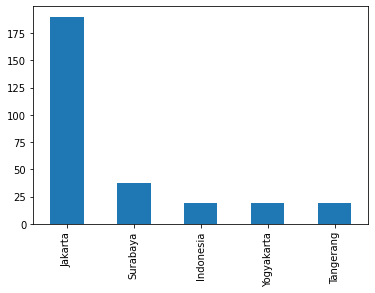

In [4]:
detail_location = sample_df.Location.value_counts()
print(detail_location)

sample_df.Location.value_counts().plot(kind = 'bar')

In [5]:
sample_df.loc[:,['Fee']]

,Fee
1,
2,Rp.7.000.000-Rp.20.000.000
3,Rp.5.000.000-Rp.6.500.000
4,Rp.5.500.000-Rp.6.800.000
5,Rp.5.000.000-Rp.10.000.000
...,...
281,Rp.5.000.000-Rp.10.000.000
282,
283,
284,


In [6]:
df2 = sample_df.copy()    

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 1 to 285
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     285 non-null    object
 1   Company   285 non-null    object
 2   Location  285 non-null    object
 3   Fee       285 non-null    object
dtypes: object(4)
memory usage: 11.1+ KB


In [8]:
df2['Fee'].replace('',np.nan,inplace=True)

In [9]:
df2.isnull().sum()

Title         0
Company       0
Location      0
Fee         133
dtype: int64

In [10]:
rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
rows_with_nan

[1,
 7,
 9,
 12,
 13,
 14,
 15,
 16,
 22,
 24,
 27,
 28,
 29,
 30,
 31,
 37,
 39,
 42,
 43,
 44,
 45,
 46,
 52,
 54,
 57,
 58,
 59,
 60,
 61,
 67,
 69,
 72,
 73,
 74,
 75,
 76,
 82,
 84,
 87,
 88,
 89,
 90,
 91,
 97,
 99,
 102,
 103,
 104,
 105,
 106,
 112,
 114,
 117,
 118,
 119,
 120,
 121,
 127,
 129,
 132,
 133,
 134,
 135,
 136,
 142,
 144,
 147,
 148,
 149,
 150,
 151,
 157,
 159,
 162,
 163,
 164,
 165,
 166,
 172,
 174,
 177,
 178,
 179,
 180,
 181,
 187,
 189,
 192,
 193,
 194,
 195,
 196,
 202,
 204,
 207,
 208,
 209,
 210,
 211,
 217,
 219,
 222,
 223,
 224,
 225,
 226,
 232,
 234,
 237,
 238,
 239,
 240,
 241,
 247,
 249,
 252,
 253,
 254,
 255,
 256,
 262,
 264,
 267,
 268,
 269,
 270,
 271,
 277,
 279,
 282,
 283,
 284,
 285]

In [11]:
df2[df2.Fee.isnull()].index.tolist()
print(len(df2[df2.Fee.isnull()].index.tolist()))

133


In [12]:
df2.dropna(axis=0,inplace=True)

In [13]:
df2

,Title,Company,Location,Fee
2,Data Analyst,DELOS Aqua,Jakarta,Rp.7.000.000-Rp.20.000.000
3,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
4,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
5,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
6,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
...,...,...,...,...
275,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
276,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
278,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000
280,Business Analyst,Niscaya Official,Jakarta,Rp.4.000.000-Rp.7.000.000


In [14]:
juta=[]
for x in df2['Fee']:
    fee_juta = x[:][3:6]
    juta.append(fee_juta)

df2['Fee(juta)'] = juta
df2

,Title,Company,Location,Fee,Fee(juta)
2,Data Analyst,DELOS Aqua,Jakarta,Rp.7.000.000-Rp.20.000.000,7.0
3,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000,5.0
4,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000,5.5
5,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
6,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000,5.0
...,...,...,...,...,...
275,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
276,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000,5.0
278,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000,8.0
280,Business Analyst,Niscaya Official,Jakarta,Rp.4.000.000-Rp.7.000.000,4.0


<AxesSubplot:title={'center':'Range Gaji Data Analyst'}, xlabel='Nominal Gaji', ylabel='Jumlah'>

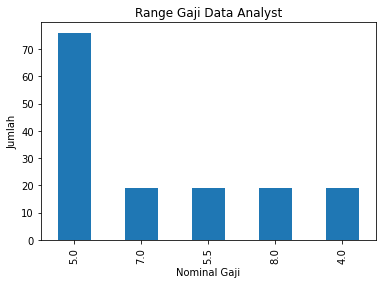

In [15]:
df2['Fee(juta)'].value_counts(ascending=False).plot(kind='bar', title='Range Gaji Data Analyst', xlabel ='Nominal Gaji', ylabel ='Jumlah')